### PG47102 | Carolina Gil Afonso Santejo | Mestrado em Engenharia Informática

## **SMT solving - Questão para avaliação**

# 1. Futoshiki Puzzle

**Formato do ficheiro de texto:**

    Tamanho do tabuleiro
    Restrição
    Restrição
    ...
**Formato das restrições:**

    <: linha1 coluna1, linha2 coluna2
    >: linha1 coluna1, linha2 coluna2
    número: linha coluna

**Por exemplo:**

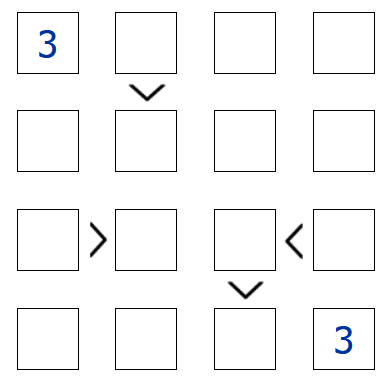

O tabuleiro da imagem é equivalente ao seguinte ficheiro:  

    4
    3: 1 1
    >: 1 2, 2 2
    >: 3 1, 3 2
    <: 3 3, 3 4
    >: 3 3, 4 3
    3: 4 4

### **Resolução em código python**


In [ ]:
!pip install z3-solver

In [2]:
from z3 import *
import numpy as np
from pandas import *
import re

In [ ]:
file = input("Ficheiro do tabuleiro >> ")

try:
  f = open(file, "r")

  size = int(f.readline())


  tab = [ [ Int(f"x_{i+1}_{j+1}") for j in range(size) ] for i in range(size) ]


  # LISTA DE RESTRIÇÕES INICIAIS

  # Cada valor entre 1 e 'size'
  elems  = [ And(1 <= tab[i][j], tab[i][j] <= size) for i in range(size) for j in range(size) ]

  # Números diferentes na mesma linha
  linhas   = [ Distinct(tab[i]) for i in range(size) ]

  # Números diferentes na mesma coluna
  colunas   = [ Distinct([ tab[i][j] for i in range(size) ]) for j in range(size) ]

  # Juntar todas as restrições gerais do tabuleiro na mesma lista
  tabRInit = elems + linhas + colunas

  s = Solver()

  # Adicionar as as restrições gerais do tabuleiro ao solver
  s.add(tabRInit)

  # Parse do ficheiro

  for linha in f:
      l = re.search(r'[^:]+',linha).group(0)
      if l.isdecimal():
          position = re.search(r'[^:]+: +(\d+) +(\d+)',linha)
          if position:
            x = int(position.group(1))
            y = int(position.group(2))
            s.add(tab[x-1][y-1] == int(l))
          else:
            print("Linha incorreta!")

      elif l == "<" or l == ">":
          position = re.search(r'[^:]+: *(\d+) +(\d+), *(\d+) +(\d+)',linha)
          if position:
            x1 = int(position.group(1))
            y1 = int(position.group(2))
            x2 = int(position.group(3))
            y2 = int(position.group(4))
            if (l == "<"):
                s.add(tab[x1-1][y1-1] < tab[x2-1][y2-1])
            else:
                s.add(tab[x1-1][y1-1] > tab[x2-1][y2-1])
          else:
            print("Linha incorreta!")
      else:
          print("Linha incorreta!")
          break

  # Resolução do tabuleiro

  if s.check() == sat:
      m = s.model()
      r = [ [ m.evaluate(tab[i][j]) for j in range(size) ]
            for i in range(size) ]
      print("Resolução do tabuleiro:\n")
      a = np.array(r)
      for line in a:
          print ('  '.join(map(str, line)))
  else:
      print("Não é possível resolver")
except FileNotFoundError:
  print('Ficheiro não encontrado!')

### **Exemplo de resolução**

Para o seguinte ficheiro de input (tab.txt):

    4
    3: 1 1
    >: 1 2, 2 2
    >: 3 1, 3 2
    <: 3 3, 3 4
    >: 3 3, 4 3
    3: 4 4

O output será:

    Ficheiro do tabuleiro >> tab.txt
    Resolução do tabuleiro:

    3  4  2  1
    1  3  4  2
    2  1  3  4
    4  2  1  3